In [1]:
def experiment(X, y):
    # 1. Получение важности из Sklearn, rfpimp, treeinterpreter (Возвращает (Series, Series, Series, RF_model, Optuna_study))
    imp_sklearn, imp_rfpimp, imp_tree, rf, study = sklearn_importance(X, y)
    best_params = study.best_params
    print(f'best_params: {best_params}')
    print(f'the importance of sklearn: {imp_sklearn}')
    print(f'the importance of rfpimp: {imp_rfpimp}')
    print(f'the importance of treeinterpreter: {imp_tree}')
    
    # 2. Получение важности из R randomForest (Возвращает Series)
    imp_r_rf = r_randomforest_importance(X, y, **best_params)
    print(f'the importance of  R_randomForest: {imp_r_rf}')
    
    # 3. Получение важности из R ranger (Возвращает Series)
    imp_r_ranger = r_ranger_importance_air(X, y, **best_params)
    print(f'the importance of R_range: {imp_r_ranger}')
    
    # 4. Получение важности из randomForestSRC (Возвращает Series)
    imp_r_src = r_randomforestsrc_importance(X, y, **best_params)
    print(f'the importance of randomForestSRC: {imp_r_src}')

    # 5. Получение важности из r_party_cforest (Возвращает Series)
    imp_r_party = r_party_cforest_importance_classification(
        X, y, **best_params)
    print(f'the importance of r_party_cforest: {imp_r_party}')

    # 6. Получение важности из r_partykit_cforest (Возвращает Series)
    imp_r_partykit = r_partykit_importance(X, y, **best_params)
    print(f'the importance of r_partykit: {imp_r_partykit}')

    # 7. Получение важности из ufi_importance_calculation (Возвращает Series)
    imp_ufi = ufi_importance_calculation(rf, X, y)
    print(f'the importance of ufi: {imp_ufi}')
    
    # Фильтруем None на случай сбоя R-функции и формируем списки
    importance_series_list = []
    titles_list = []

    importance_series_list.append(imp_sklearn)
    titles_list.append('Sklearn(MDI)')

    importance_series_list.append(imp_rfpimp)
    titles_list.append('Rfpimp(MDA)')

    importance_series_list.append(imp_tree)
    titles_list.append('treeinterpreter(MDI-OOB)')

    importance_series_list.append(imp_r_rf)
    titles_list.append('R_RF(MDI)')

    importance_series_list.append(imp_r_ranger)
    titles_list.append('R_Ranger(AIR)')

    importance_series_list.append(imp_r_src)
    titles_list.append('RFSRC(MDI-OOB)')

    importance_series_list.append(imp_r_party)
    titles_list.append('Party(MDA)')

    importance_series_list.append(imp_r_partykit)
    titles_list.append('Partykit(MDA)')
    
    importance_series_list.append(imp_ufi)
    titles_list.append('UFI(MDI-OOB)')
    
    picture(importance_series_list, titles_list)
    return importance_series_list

<font size="8">Import the necessary libraries and load the dataset.</font>

In [2]:
import pandas as pd
from importance_lib.pic import picture
from importance_lib.python_implementations import sklearn_importance, ufi_importance_calculation
import numpy as np
from importance_lib.r_implementations import r_partykit_importance, r_randomforest_importance, r_ranger_importance_air, r_party_cforest_importance_classification, r_randomforestsrc_importance, r_ranger_importance_sobol
import random

data = pd.read_csv("rent.csv")
features = data.columns[:5].tolist()
X, y = data[features], data["interest_level"]

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.
R callback write-console: In addition:   
R callback write-console: Warning message:
  
R callback write-console: In Sys.setlocale("LC_ALL", "en_US.UTF-8") :  
R callback write-console: 
   
R callback write-console:  using locale code page other than 1251 may cause problems
  


<font size="8">Source features.</font>

[I 2026-02-04 11:33:05,411] A new study created in memory with name: no-name-a1239904-ec08-41c2-af57-a0be91b7584d
[I 2026-02-04 11:33:06,747] Trial 0 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 104, 'max_depth': 1, 'min_samples_leaf': 16, 'max_features': 0.3333333333333333}. Best is trial 0 with value: 0.6962589600060789.
[I 2026-02-04 11:33:07,310] Trial 1 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 48, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 0.25}. Best is trial 0 with value: 0.6962589600060789.
[I 2026-02-04 11:33:07,819] Trial 2 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 41, 'max_depth': 2, 'min_samples_leaf': 14, 'max_features': 0.5}. Best is trial 0 with value: 0.6962589600060789.
[I 2026-02-04 11:33:08,503] Trial 3 finished with value: 0.7059851574174919 and parameters: {'n_estimators': 41, 'max_depth': 9, 'min_samples_leaf': 18, 'max_features': 'sqrt'}. Best is trial 3 with va

{'n_estimators': 146, 'max_depth': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
best_params: {'n_estimators': 146, 'max_depth': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
the importance of sklearn: price        0.376104
latitude     0.236880
longitude    0.230741
bedrooms     0.124078
bathrooms    0.032197
dtype: float64
the importance of rfpimp: price        0.126228
bedrooms     0.074967
longitude    0.023807
latitude     0.018438
bathrooms    0.003141
dtype: float64
the importance of treeinterpreter: price        0.070047
bedrooms     0.043791
latitude     0.033026
longitude    0.031255
bathrooms    0.008348
dtype: float64
Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude
Importance matrix shape: (5, 1)
Successfully computed variable importance
the importance of  R_randomForest: price        4509.725546
latitude     3253.910012
longitude    3210.937565
bedrooms     1061.816529
bathrooms     304.109417
dtype: float64
Tra

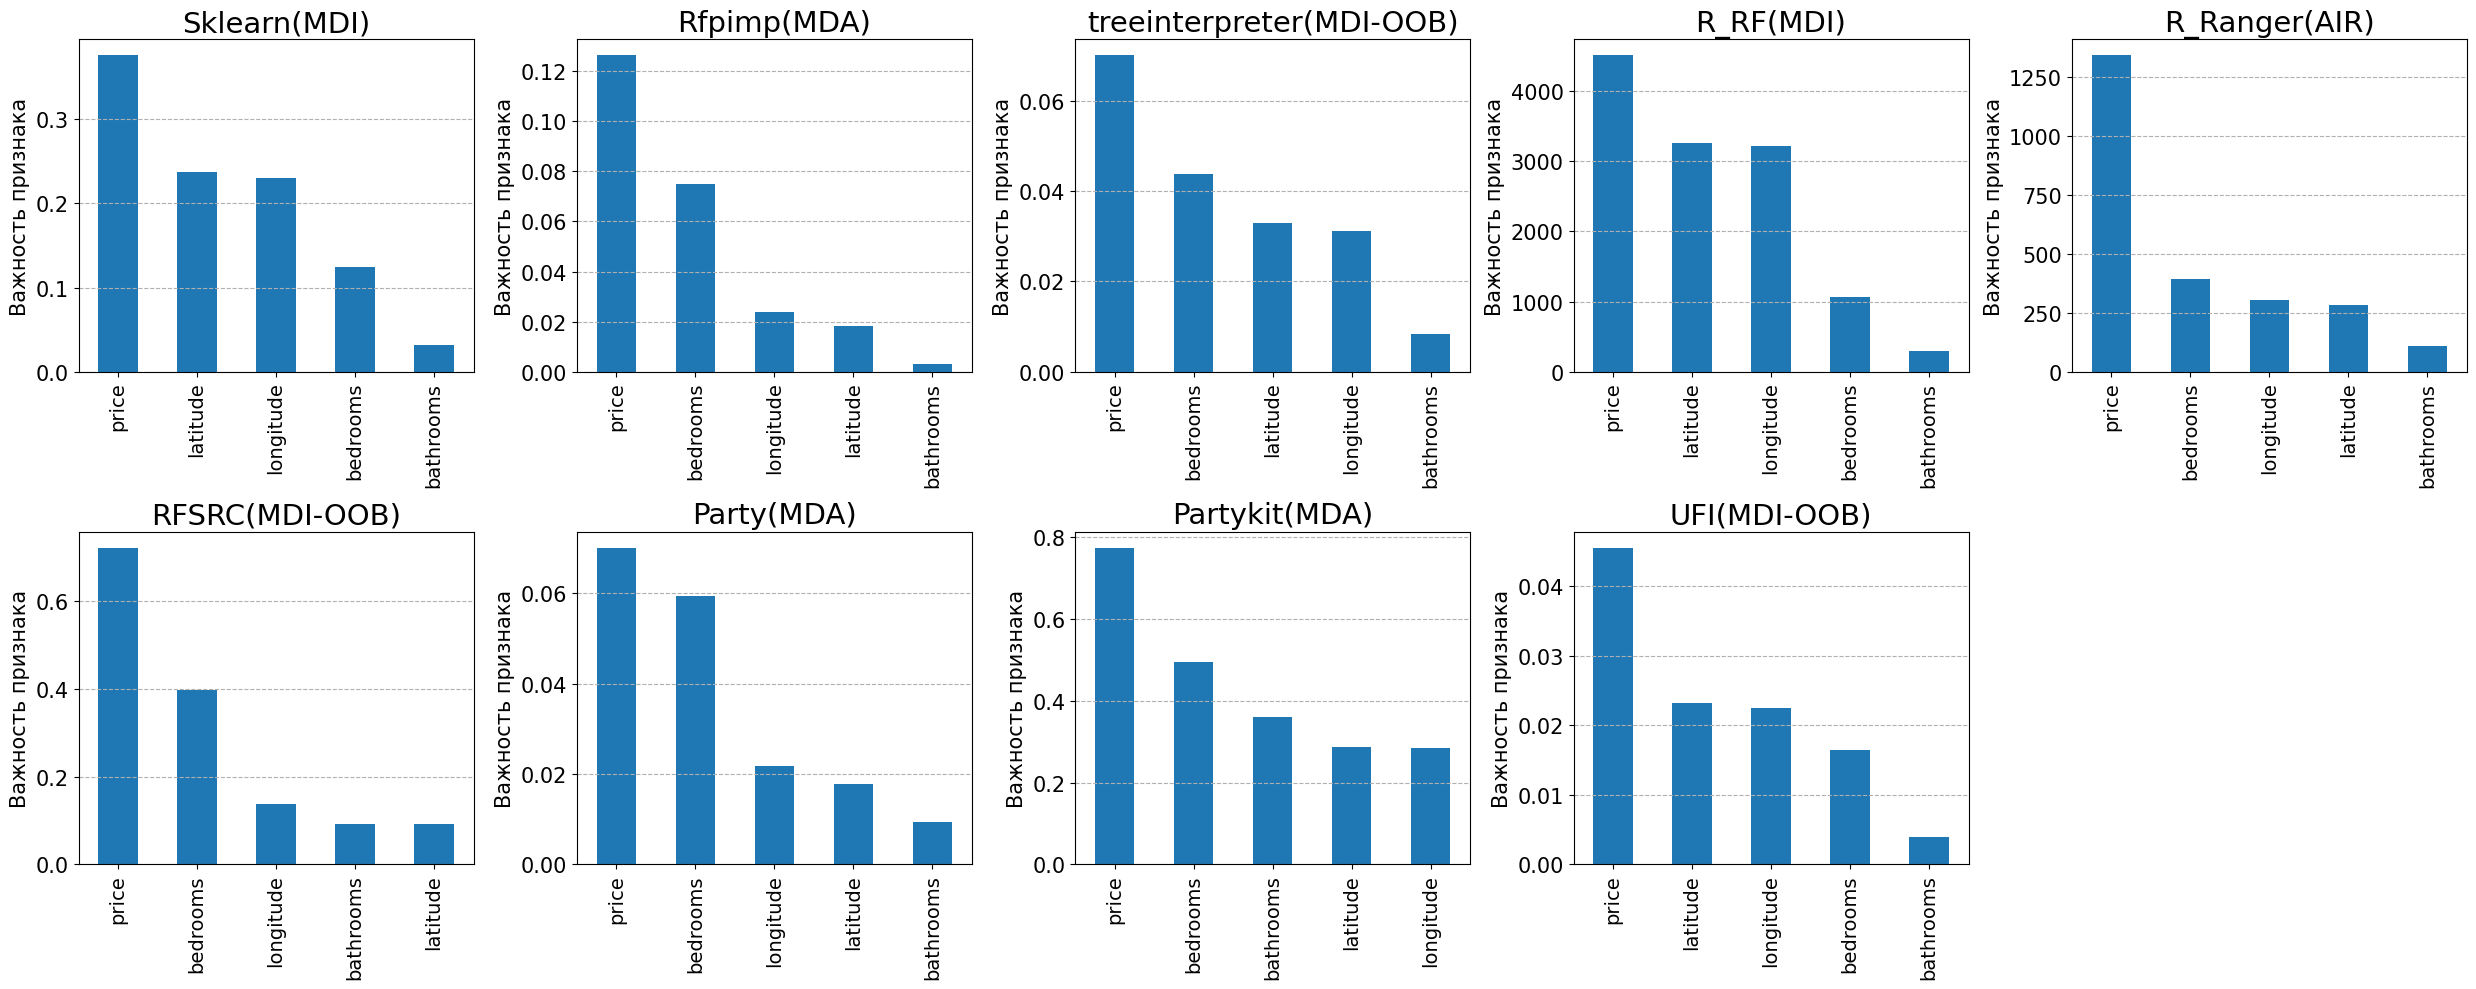

In [3]:
importance_series_list_1 = experiment(X, y)

In [4]:
importance_series_list_1

[price        0.376104
 latitude     0.236880
 longitude    0.230741
 bedrooms     0.124078
 bathrooms    0.032197
 dtype: float64,
 price        0.126228
 bedrooms     0.074967
 longitude    0.023807
 latitude     0.018438
 bathrooms    0.003141
 dtype: float64,
 price        0.070047
 bedrooms     0.043791
 latitude     0.033026
 longitude    0.031255
 bathrooms    0.008348
 dtype: float64,
 price        4509.725546
 latitude     3253.910012
 longitude    3210.937565
 bedrooms     1061.816529
 bathrooms     304.109417
 dtype: float64,
 price        1340.634472
 bedrooms      393.297050
 longitude     303.514349
 latitude      282.156290
 bathrooms     108.661496
 dtype: float64,
 price        0.720981
 bedrooms     0.396698
 longitude    0.137358
 bathrooms    0.091351
 latitude     0.091254
 Name: randomForestSRC_MDI_OOB, dtype: float64,
 price        0.070052
 bedrooms     0.059262
 longitude    0.021822
 latitude     0.017688
 bathrooms    0.009312
 Name: party_cforest_importance,

<font size="8">Initial features + different types of random features (random_uniform, random_normal, random_int, random_binary).</font>

In [5]:
X["random_uniform"] = np.random.uniform(
    0, 1, size=len(X))  # равномерное распределение
X["random_normal"] = np.random.normal(
    0, 1, size=len(X))  # нормальное распределение
X["random_int"] = np.random.randint(0, 100, size=len(X))  # целые числа 0-99
X["random_binary"] = np.random.choice([0, 1], size=len(X))  # бинарные значения

[I 2026-02-04 13:10:02,023] A new study created in memory with name: no-name-7cdbb8c3-1e9a-4586-ad90-b5b8e435a512
[I 2026-02-04 13:10:03,585] Trial 0 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 123, 'max_depth': 1, 'min_samples_leaf': 18, 'max_features': 0.25}. Best is trial 0 with value: 0.6962589600060789.
[I 2026-02-04 13:10:04,345] Trial 1 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 58, 'max_depth': 1, 'min_samples_leaf': 9, 'max_features': 0.5}. Best is trial 0 with value: 0.6962589600060789.
[I 2026-02-04 13:10:05,991] Trial 2 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 142, 'max_depth': 1, 'min_samples_leaf': 18, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6962589600060789.
[I 2026-02-04 13:10:07,371] Trial 3 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 114, 'max_depth': 1, 'min_samples_leaf': 15, 'max_features': 0.7}. Best is trial 0 with value: 0.696258

{'n_estimators': 92, 'max_depth': 13, 'min_samples_leaf': 15, 'max_features': 0.7}
best_params: {'n_estimators': 92, 'max_depth': 13, 'min_samples_leaf': 15, 'max_features': 0.7}
the importance of sklearn: price             0.341880
latitude          0.156033
longitude         0.151164
bedrooms          0.132168
random_uniform    0.069840
random_normal     0.068909
random_int        0.055345
bathrooms         0.016380
random_binary     0.008282
dtype: float64
the importance of rfpimp: price             0.119947
bedrooms          0.072941
longitude         0.026036
latitude          0.011346
random_uniform    0.001317
bathrooms         0.000405
random_binary    -0.000101
random_normal    -0.000810
random_int       -0.000810
dtype: float64
the importance of treeinterpreter: price             0.072888
bedrooms          0.046753
longitude         0.031467
latitude          0.029855
random_normal     0.008751
random_uniform    0.008669
random_int        0.007063
bathrooms         0.004310
r

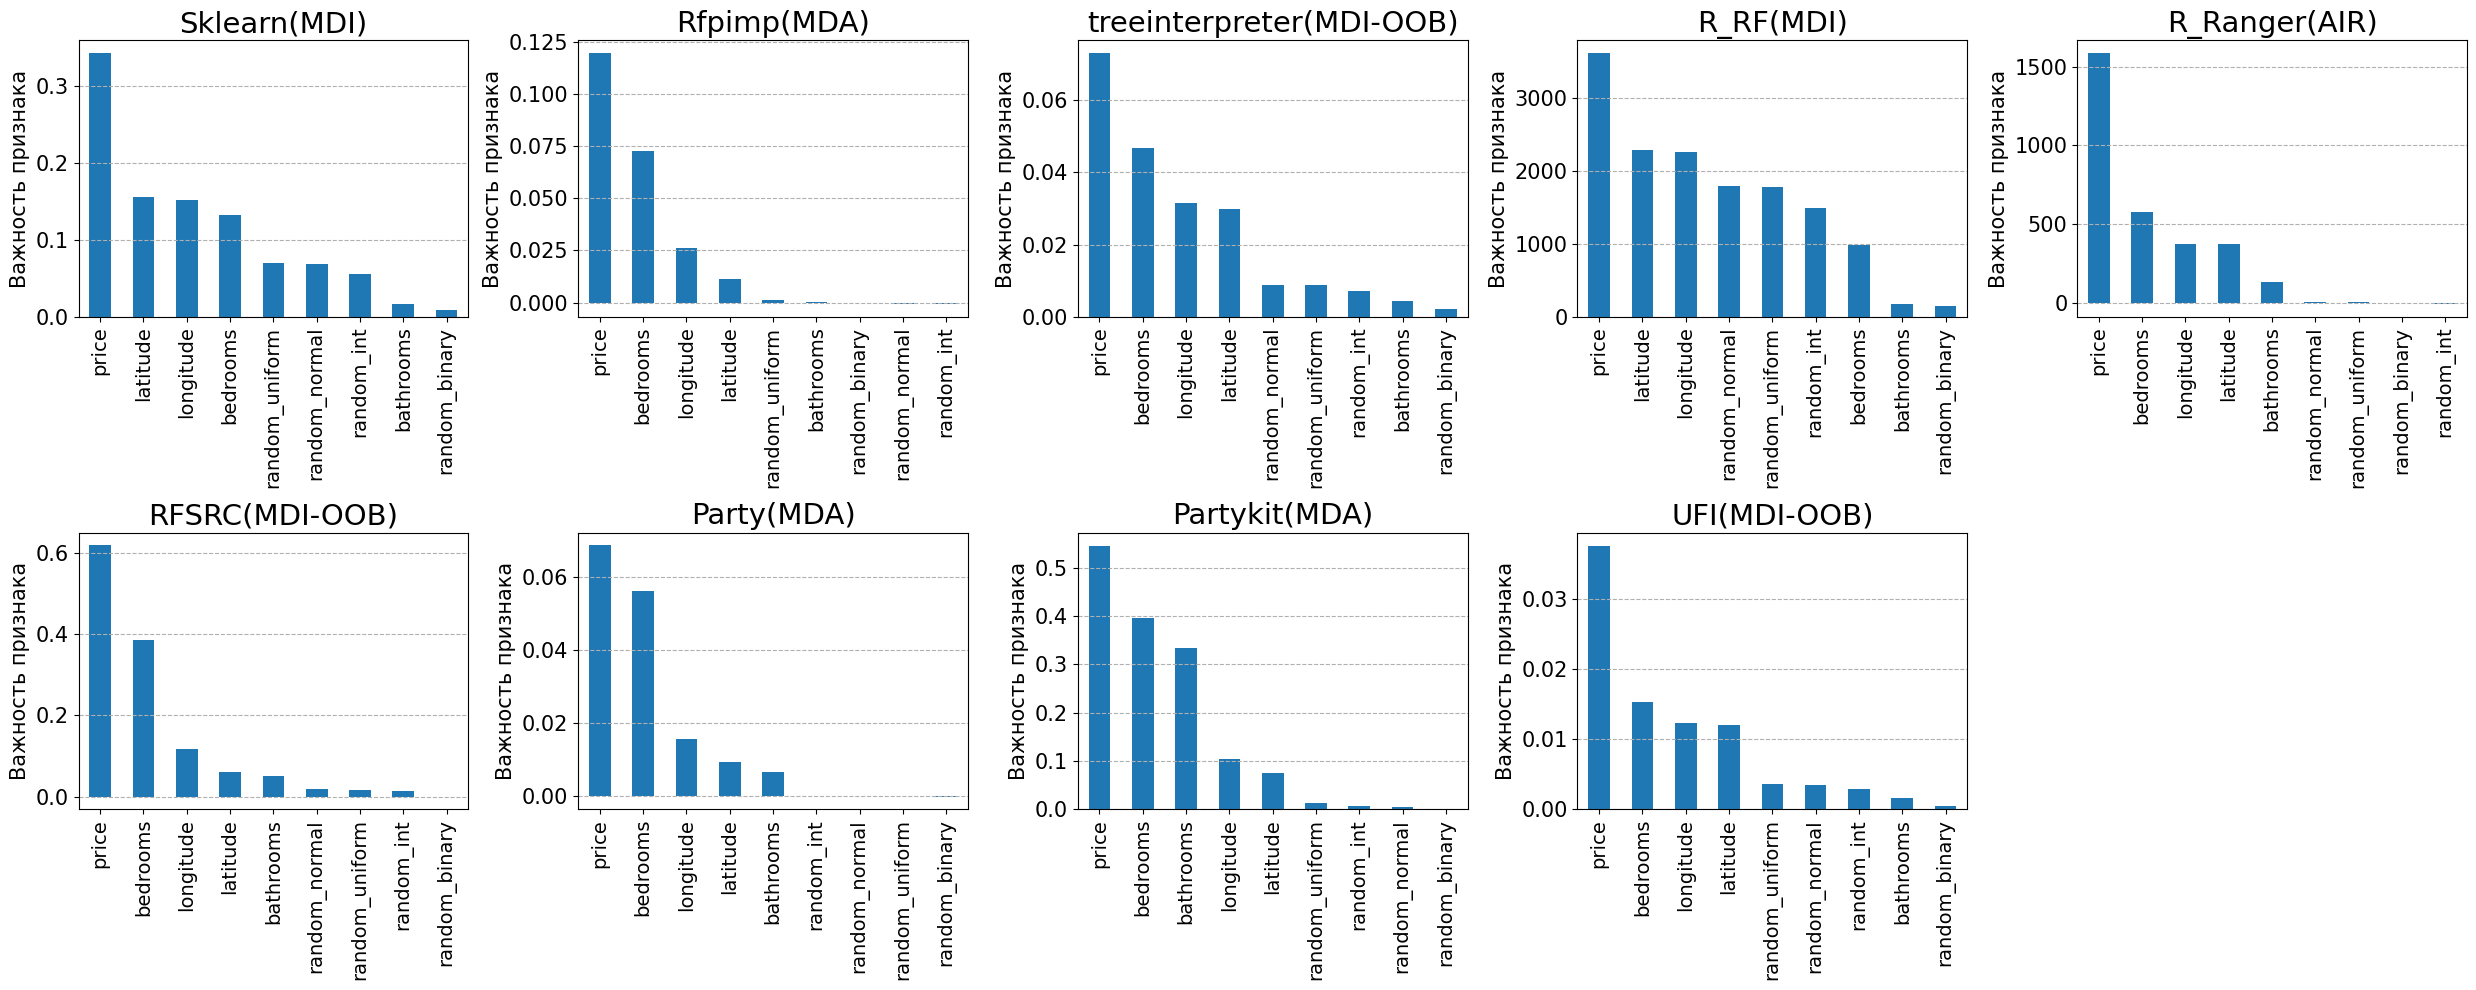

In [6]:
importance_series_list_2 = experiment(X, y)

In [7]:
importance_series_list_2

[price             0.341880
 latitude          0.156033
 longitude         0.151164
 bedrooms          0.132168
 random_uniform    0.069840
 random_normal     0.068909
 random_int        0.055345
 bathrooms         0.016380
 random_binary     0.008282
 dtype: float64,
 price             0.119947
 bedrooms          0.072941
 longitude         0.026036
 latitude          0.011346
 random_uniform    0.001317
 bathrooms         0.000405
 random_binary    -0.000101
 random_normal    -0.000810
 random_int       -0.000810
 dtype: float64,
 price             0.072888
 bedrooms          0.046753
 longitude         0.031467
 latitude          0.029855
 random_normal     0.008751
 random_uniform    0.008669
 random_int        0.007063
 bathrooms         0.004310
 random_binary     0.002110
 dtype: float64,
 price             3616.049857
 latitude          2295.171878
 longitude         2269.699352
 random_normal     1792.991904
 random_uniform    1785.906465
 random_int        1496.095053
 bedroo

<font size="8">Source features + copy of the 'price' feature.</font>

In [8]:
X = X.drop(["random_int", "random_binary",
           "random_uniform", "random_normal"], axis=1)

X["price1"] = X["price"]
X["price2"] = X["price"]
X["price3"] = X["price"]

[I 2026-02-04 13:55:48,639] A new study created in memory with name: no-name-d7569d38-5953-4530-808e-7fce157e992e
[I 2026-02-04 13:55:49,539] Trial 0 finished with value: 0.7070996175375497 and parameters: {'n_estimators': 100, 'max_depth': 6, 'min_samples_leaf': 17, 'max_features': 0.7}. Best is trial 0 with value: 0.7070996175375497.
[I 2026-02-04 13:55:50,045] Trial 1 finished with value: 0.7078594767103163 and parameters: {'n_estimators': 46, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 0.7}. Best is trial 1 with value: 0.7078594767103163.
[I 2026-02-04 13:55:50,648] Trial 2 finished with value: 0.6996023403662521 and parameters: {'n_estimators': 110, 'max_depth': 3, 'min_samples_leaf': 15, 'max_features': 0.3333333333333333}. Best is trial 1 with value: 0.7078594767103163.
[I 2026-02-04 13:55:51,235] Trial 3 finished with value: 0.7024644765836732 and parameters: {'n_estimators': 76, 'max_depth': 4, 'min_samples_leaf': 18, 'max_features': 0.7}. Best is trial 1 with value

{'n_estimators': 143, 'max_depth': 12, 'min_samples_leaf': 14, 'max_features': 1.0}
best_params: {'n_estimators': 143, 'max_depth': 12, 'min_samples_leaf': 14, 'max_features': 1.0}
the importance of sklearn: longitude    0.222654
latitude     0.221706
bedrooms     0.140451
price1       0.104509
price        0.103994
price3       0.099052
price2       0.095892
bathrooms    0.011743
dtype: float64
the importance of rfpimp: bedrooms     0.084389
longitude    0.033634
latitude     0.021882
price        0.008915
price1       0.006686
price3       0.006382
price2       0.006180
bathrooms    0.000304
dtype: float64
the importance of treeinterpreter: bedrooms     0.049728
longitude    0.041360
latitude     0.036453
price        0.021170
price1       0.020045
price3       0.018784
price2       0.017834
bathrooms    0.003975
dtype: float64
Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude + price1 + price2 + price3
Importance matrix shape: (8, 1)

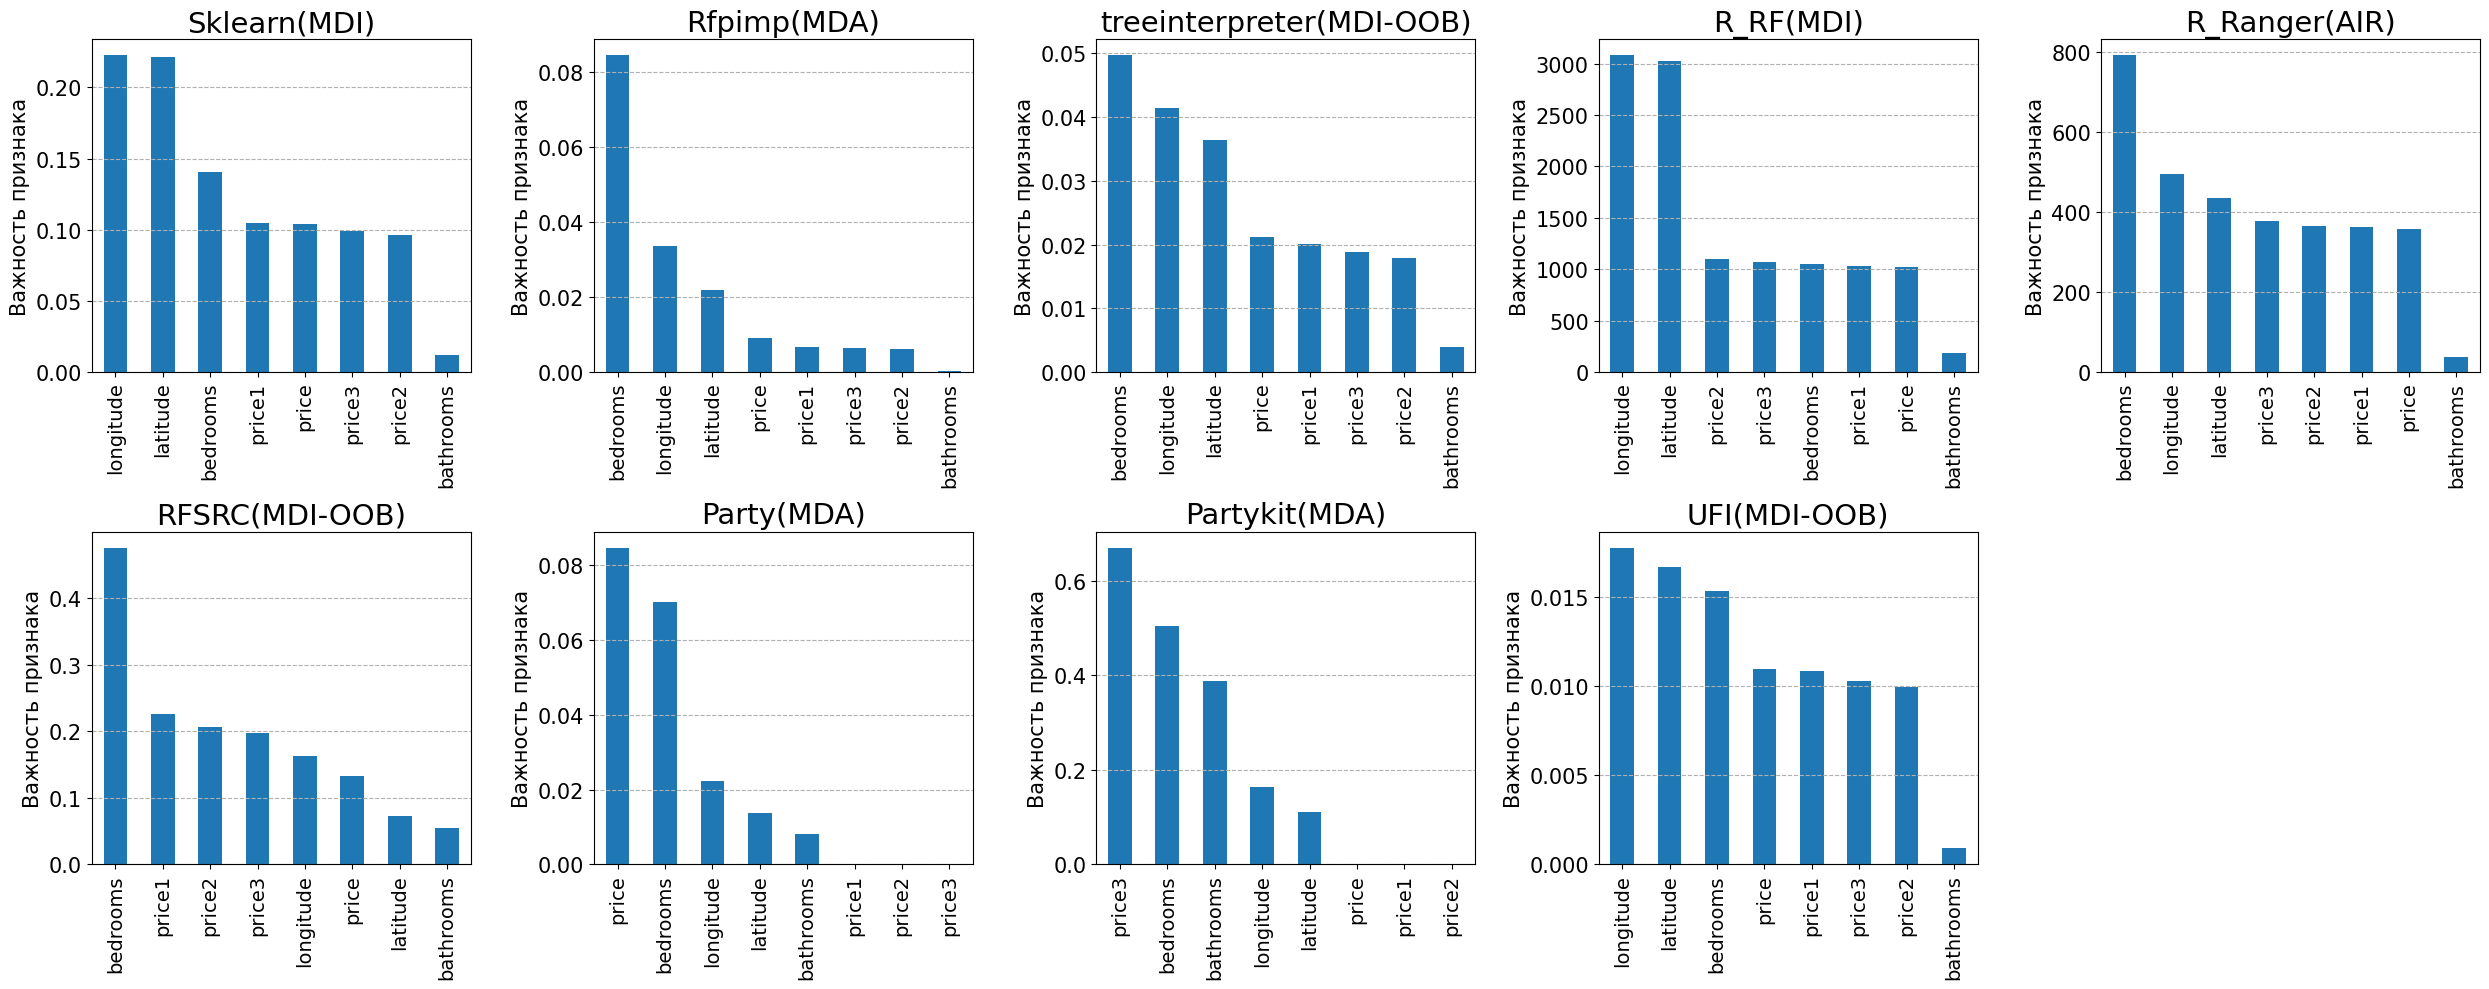

In [9]:
importance_series_list_3 = experiment(X, y)

In [10]:
importance_series_list_3

[longitude    0.222654
 latitude     0.221706
 bedrooms     0.140451
 price1       0.104509
 price        0.103994
 price3       0.099052
 price2       0.095892
 bathrooms    0.011743
 dtype: float64,
 bedrooms     0.084389
 longitude    0.033634
 latitude     0.021882
 price        0.008915
 price1       0.006686
 price3       0.006382
 price2       0.006180
 bathrooms    0.000304
 dtype: float64,
 bedrooms     0.049728
 longitude    0.041360
 latitude     0.036453
 price        0.021170
 price1       0.020045
 price3       0.018784
 price2       0.017834
 bathrooms    0.003975
 dtype: float64,
 longitude    3081.139213
 latitude     3024.774186
 price2       1098.006156
 price3       1070.038137
 bedrooms     1047.778395
 price1       1033.989364
 price        1021.463952
 bathrooms     186.401750
 dtype: float64,
 bedrooms     791.886873
 longitude    495.243638
 latitude     434.367127
 price3       377.681457
 price2       363.695064
 price1       363.449657
 price        357.6672

<font size="8">Initial features + random feature random.</font>

In [11]:
X = X.drop(["price1", "price2", "price3"], axis=1)
X["random"] = np.random.random(size=len(X))

[I 2026-02-04 14:29:36,338] A new study created in memory with name: no-name-bee1e74d-a585-4980-ad0d-3f4b44172a9b
[I 2026-02-04 14:29:36,753] Trial 0 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 69, 'max_depth': 1, 'min_samples_leaf': 2, 'max_features': 0.5}. Best is trial 0 with value: 0.6962589600060789.
[I 2026-02-04 14:29:37,247] Trial 1 finished with value: 0.697652035156151 and parameters: {'n_estimators': 78, 'max_depth': 3, 'min_samples_leaf': 17, 'max_features': 0.5}. Best is trial 1 with value: 0.697652035156151.
[I 2026-02-04 14:29:37,790] Trial 2 finished with value: 0.7073022466502875 and parameters: {'n_estimators': 58, 'max_depth': 11, 'min_samples_leaf': 13, 'max_features': 0.3333333333333333}. Best is trial 2 with value: 0.7073022466502875.
[I 2026-02-04 14:29:38,987] Trial 3 finished with value: 0.7068210025075353 and parameters: {'n_estimators': 131, 'max_depth': 7, 'min_samples_leaf': 16, 'max_features': 0.7}. Best is trial 2 with value: 

{'n_estimators': 101, 'max_depth': 13, 'min_samples_leaf': 8, 'max_features': 0.5}
best_params: {'n_estimators': 101, 'max_depth': 13, 'min_samples_leaf': 8, 'max_features': 0.5}
the importance of sklearn: price        0.359555
latitude     0.187534
longitude    0.184593
bedrooms     0.135364
random       0.106595
bathrooms    0.026359
dtype: float64
the importance of rfpimp: price        0.113362
bedrooms     0.074461
longitude    0.022186
latitude     0.019856
bathrooms    0.002330
random       0.001418
dtype: float64
the importance of treeinterpreter: price        0.069974
bedrooms     0.044678
latitude     0.029803
longitude    0.029282
random       0.010201
bathrooms    0.006596
dtype: float64
Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude + random
Importance matrix shape: (6, 1)
Successfully computed variable importance
the importance of  R_randomForest: price        4235.087457
latitude     2985.545359
longitude    2951.582195

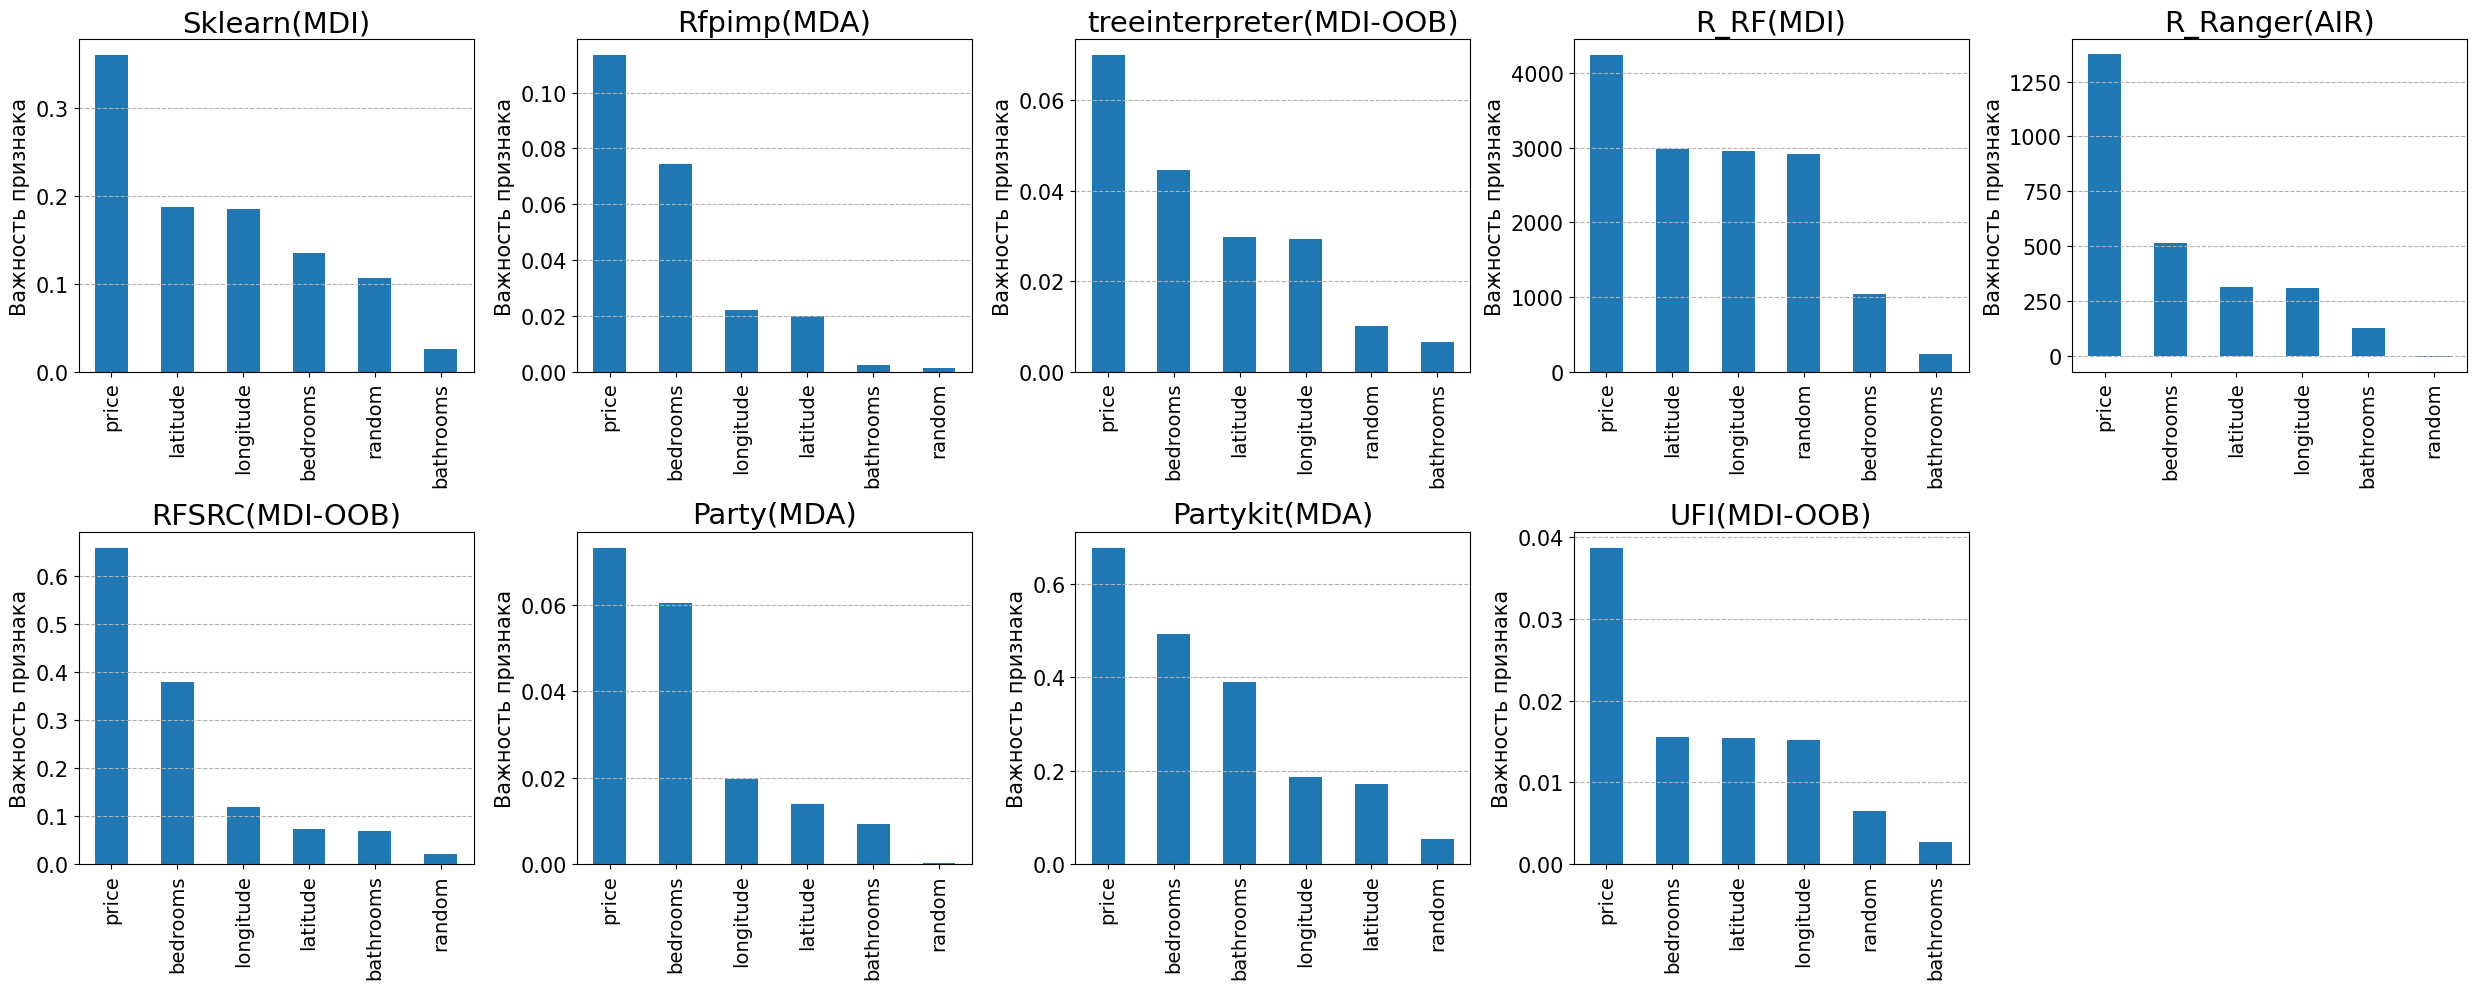

In [12]:
importance_series_list_4 = experiment(X, y)

In [13]:
importance_series_list_4

[price        0.359555
 latitude     0.187534
 longitude    0.184593
 bedrooms     0.135364
 random       0.106595
 bathrooms    0.026359
 dtype: float64,
 price        0.113362
 bedrooms     0.074461
 longitude    0.022186
 latitude     0.019856
 bathrooms    0.002330
 random       0.001418
 dtype: float64,
 price        0.069974
 bedrooms     0.044678
 latitude     0.029803
 longitude    0.029282
 random       0.010201
 bathrooms    0.006596
 dtype: float64,
 price        4235.087457
 latitude     2985.545359
 longitude    2951.582195
 random       2907.764575
 bedrooms     1044.351889
 bathrooms     241.457724
 dtype: float64,
 price        1374.517011
 bedrooms      511.413675
 latitude      311.432536
 longitude     306.306279
 bathrooms     126.893297
 random         -5.817585
 dtype: float64,
 price        0.658602
 bedrooms     0.378930
 longitude    0.119853
 latitude     0.073466
 bathrooms    0.070455
 random       0.022405
 Name: randomForestSRC_MDI_OOB, dtype: float64,
 pr

<font size="8">Rendering all cases.</font>

<font size="4">Source features.</font>

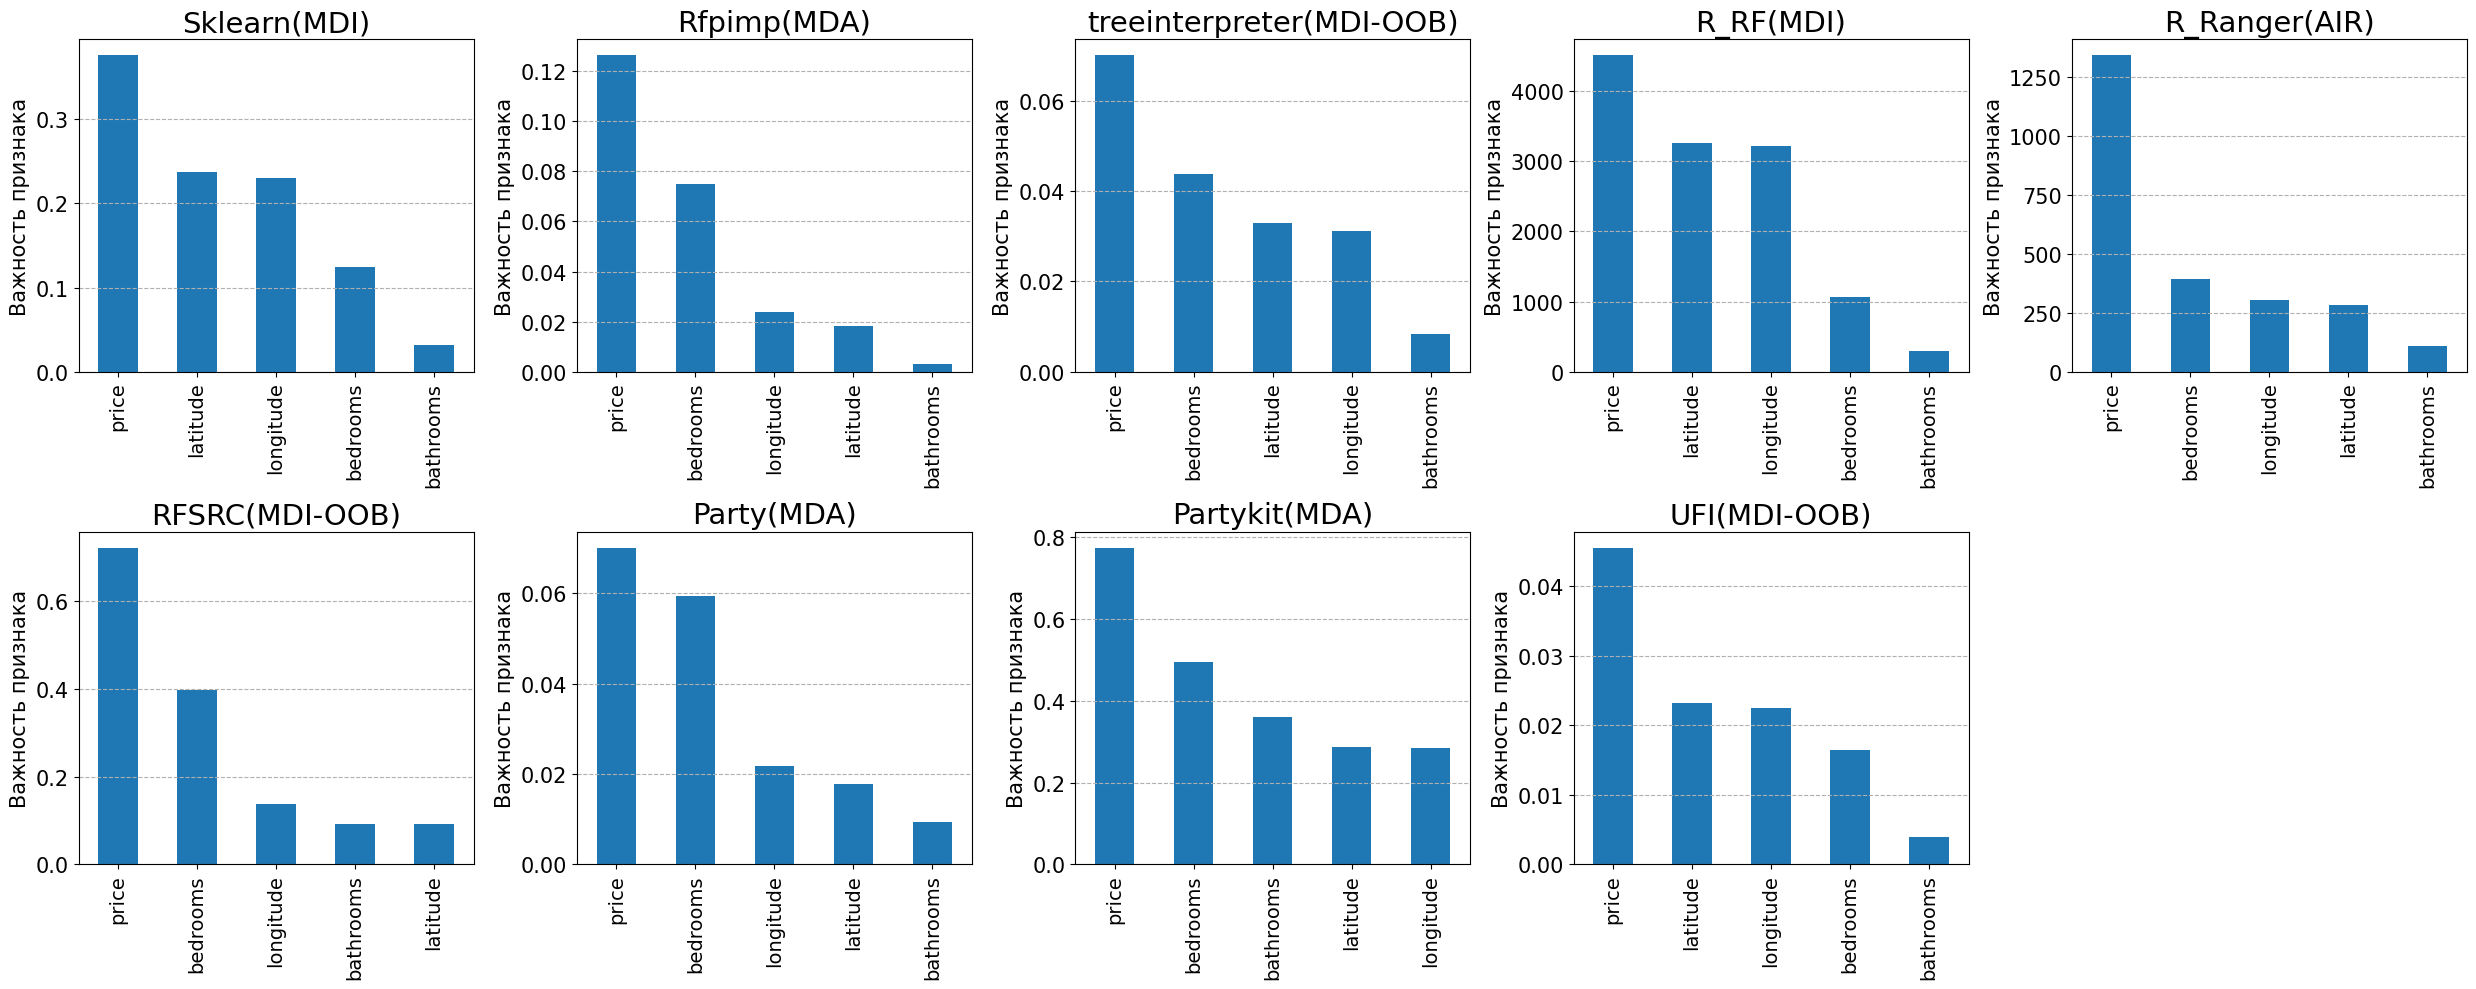

In [14]:
titles_list = ['Sklearn(MDI)', 'Rfpimp(MDA)', 'treeinterpreter(MDI-OOB)', 'R_RF(MDI)',
               'R_Ranger(AIR)', 'RFSRC(MDI-OOB)', 'Party(MDA)', 'Partykit(MDA)', 'UFI(MDI-OOB)']

picture(importance_series_list_1, titles_list)


<font size="4">Initial features + different types of random features (random_uniform, random_normal, random_int, random_binary).</font>

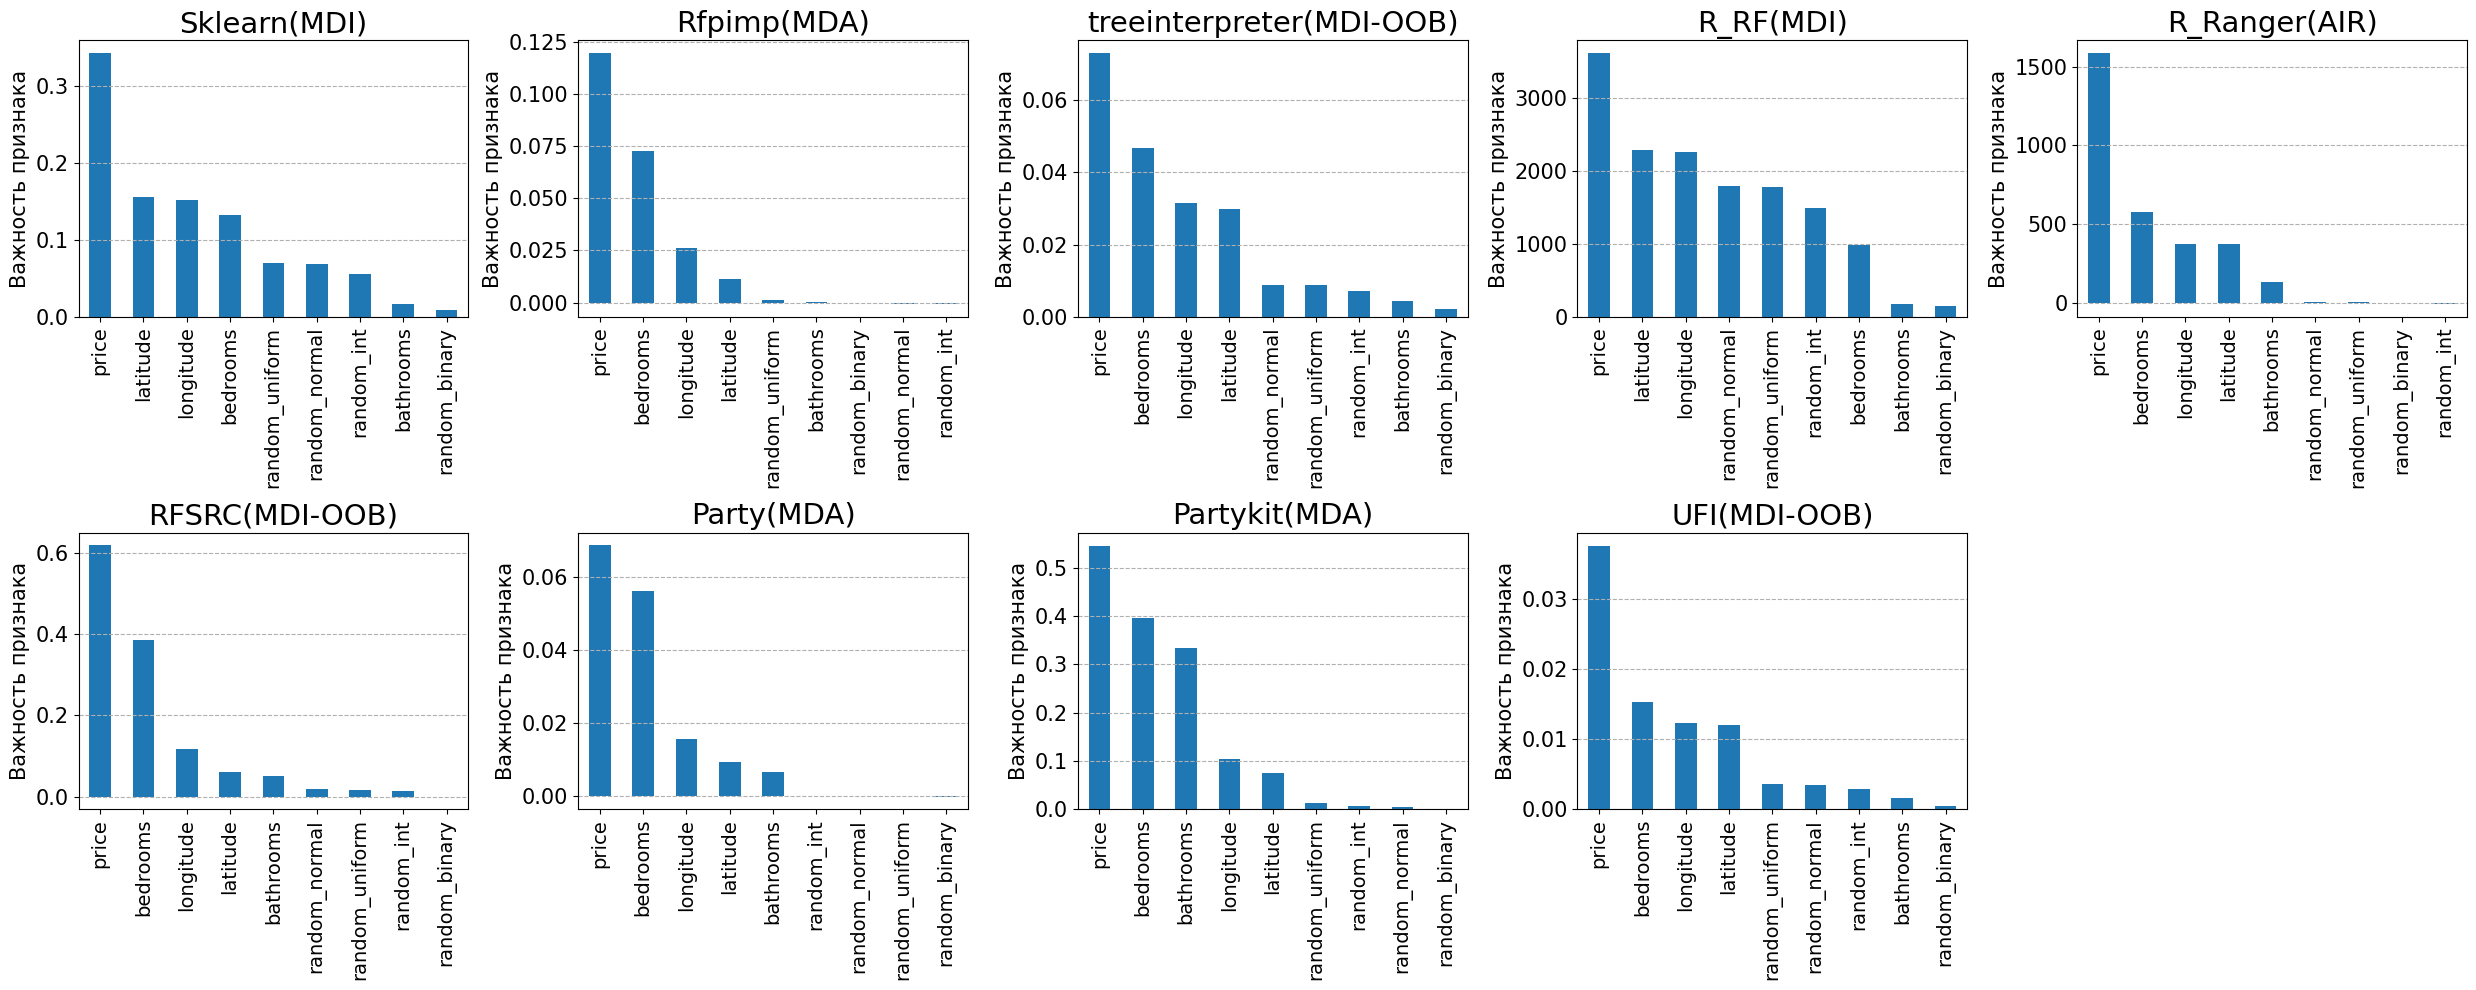

In [15]:
picture(importance_series_list_2, titles_list)

<font size="4">Source features + copy of the 'price' feature.</font>

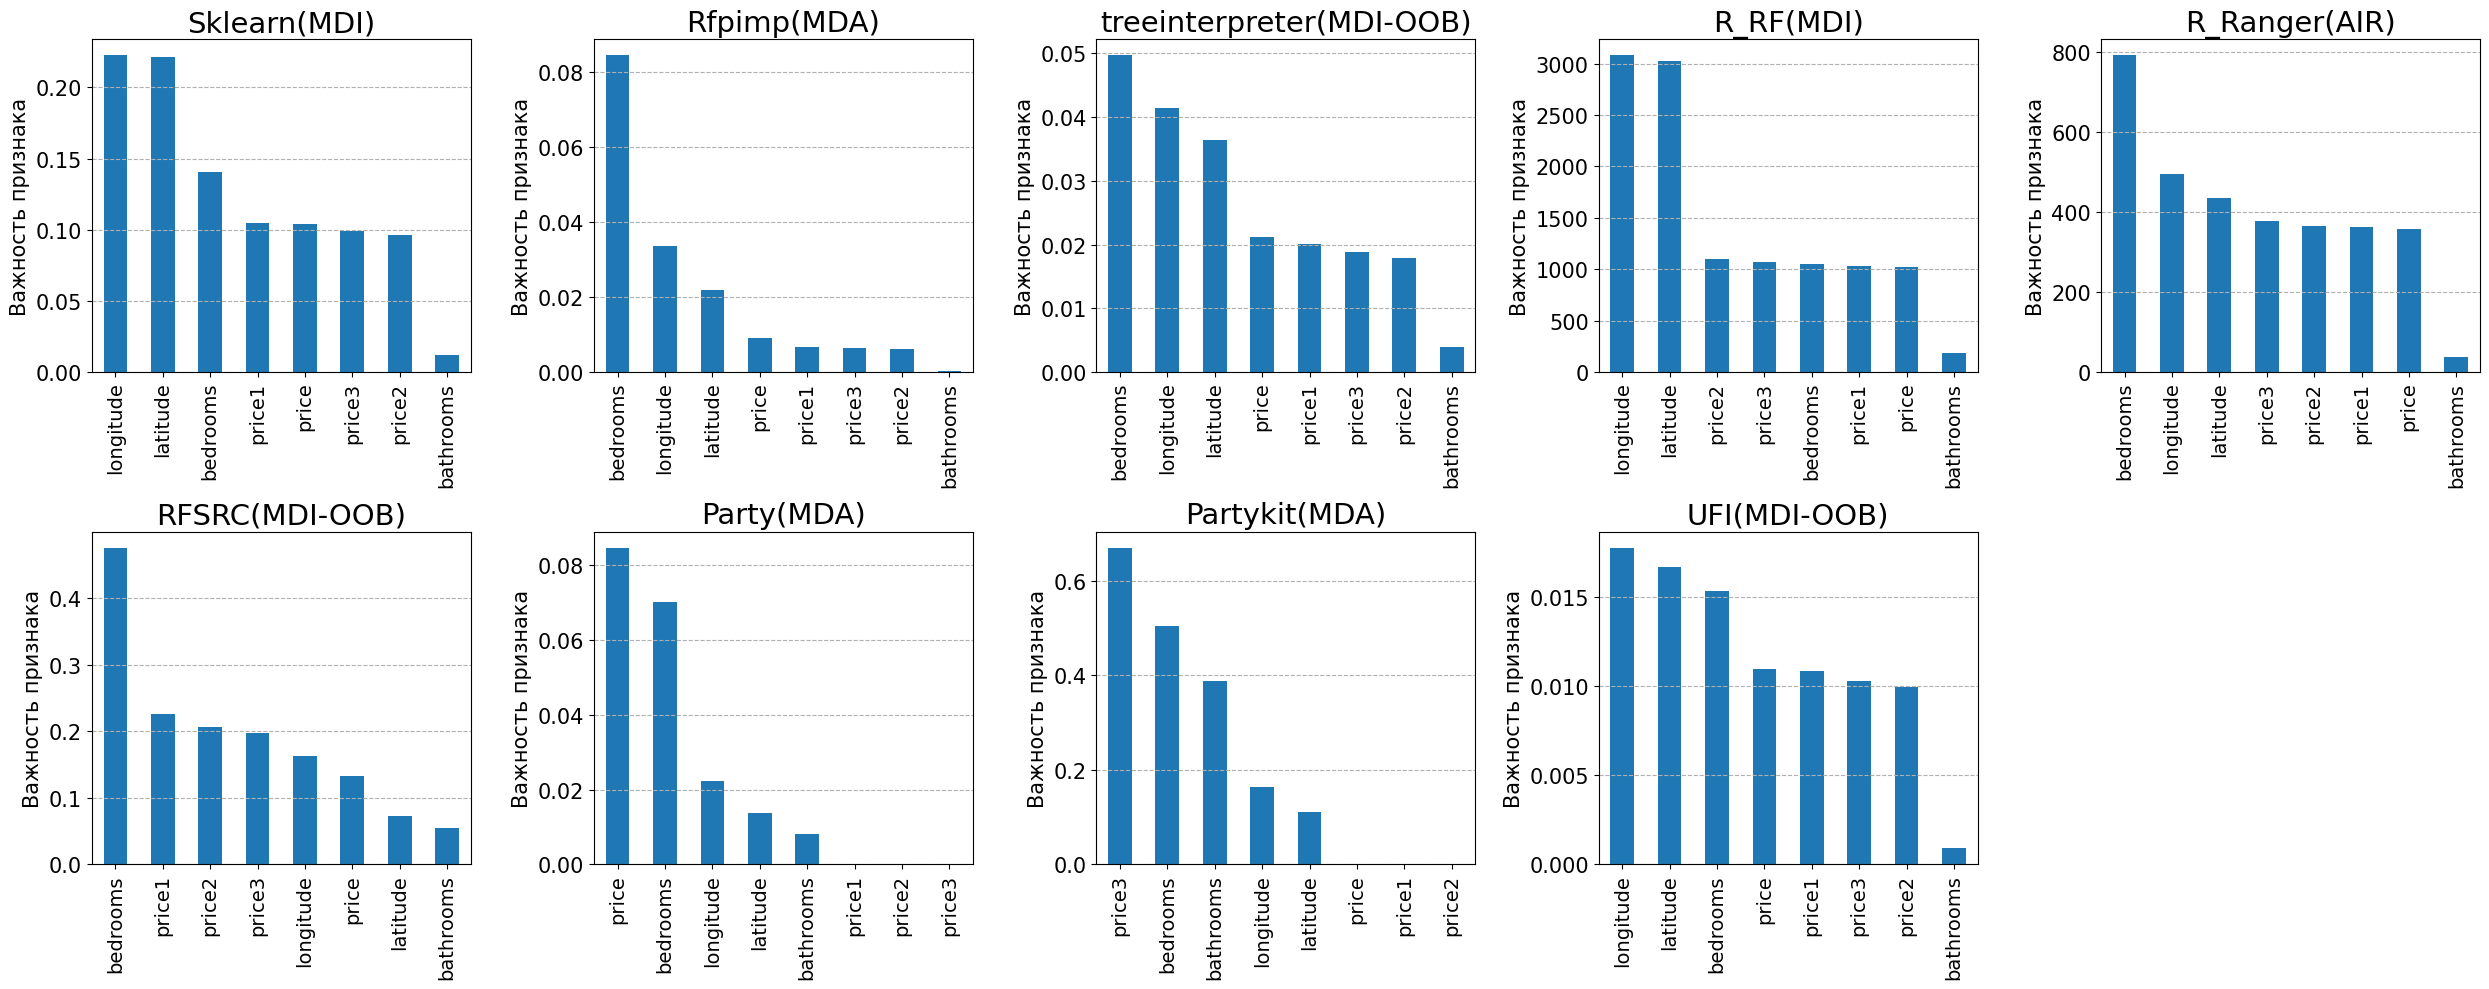

In [16]:
picture(importance_series_list_3, titles_list)

<font size="4">Initial features + random feature random.</font>

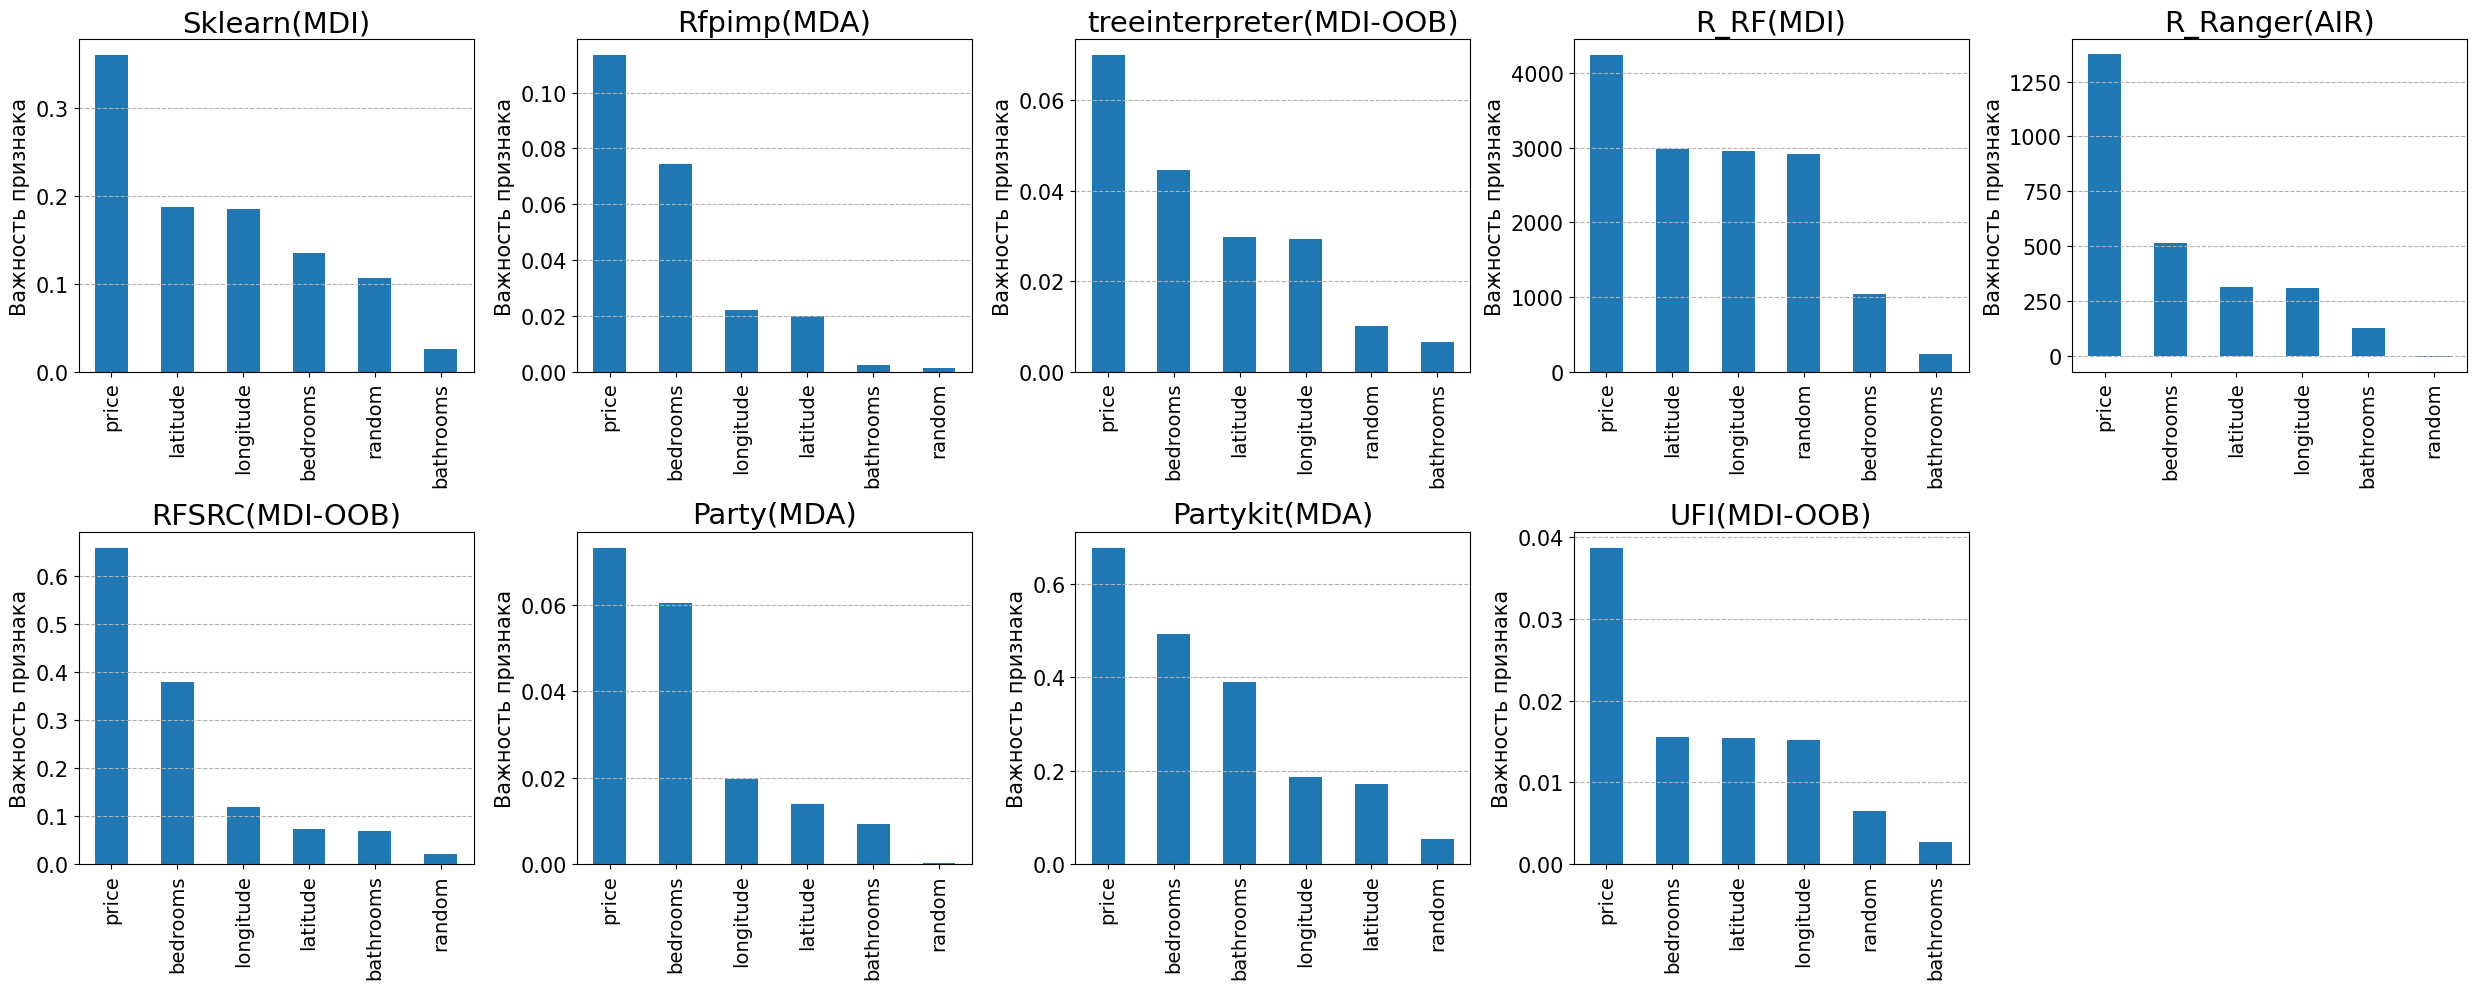

In [17]:
picture(importance_series_list_4, titles_list)